# Detection of Ransomware Attack Families via Bitcoin Transactions

This is a group project by Master 2 Data Science students at Ecole Polytechnique.

The data used in this study is courtesy of UC Irvine:

    Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

<center><center><img src="./media/UCI.jpg"/></center>

## 1. Problem Statement

### Ransomware attacks

Starting as early as 1989 with the first documented ransomware known as the AIDS trojan, the use of ransomware scams has grown internationally. Governments worldwide saw a 1,885% increase in ransomware attacks, and the health care industry faced a 755% increase in those attacks in 2021.

A ransomware attack is a virus that infects a computer, a server or a storage device, by temporarily corrupting all of its files with a special encryption. The key to unlock this encryption is only available with the attacker. In exchange for this key, the attacker demands a certain amount of ransom, this is where the attack name derives from.

Over the past four years, the ransom demanded by hackers increased by a shocking 2,966.66 percent. In 2021, the average ransom demand reached **$ 220,298** — up 43 percent compared to 2020. The explosive growth in ransomware demand was in 2019, where the average ransom demand grew 14 times, up **from $6,000 in 2018 to $84,000 by the end of the year**.

### Ransom and Bitcoin &#x20BF;
These payments usually take several forms to be executed. For instance, ransomware attackers usually demand payment to be wired through Western Union or paid through a specialized text message. Some attackers demand payment in the form of gift cards like an Amazon or iTunes Gift Card. Recently, the attackers started asking the victims to purchase the bitcoins required to pay the ransom. The victim sends the money via a bitcoin exchange to the hacker's bitcoin wallet. The criminals confirm payment via email or a Tor site and, if the victim is lucky, will provide the means to decrypt the victim's files. The attackers took advantage of the anonymity provided by the different cryptocurrencies such as Bitcoin, Ethereum or Dogecoin. Even though all transactions are public by nature, user identification is not required to join the network.

People were and still are paying these ransoms due to the importance of their encrypted data. These numbers are even increasing over the years. Especially that the proportion of Cryptolocker (a ransomware) victims claim to have agreed to pay the ransom to recover their files (41%) seems to be much larger than expected (3% was conjectured by Symantec, 0.4% by Dell SecureWorks).

### Taking action
Many studies were conducted in order to tackle this problem and try to reduce its effects on users of the world wide web. The majority of these studies were based on pre-set filtering and pre-defined rules to decide whether a party is an attacker or not.The goal was to track the different ransomware attack families in order to limit their actions and proceed to label them as malicious.

In this challenge, the goal will be to create a model that is able to detect these attacker families by tracing the cryptocurrency transactions in the entire Bitcoin transaction graph from 2009 to 2018. 

## 2. Data Exploration

The data used contains the entire Bitcoin transaction graph from 2009 January to 2018 December. Using a time interval of 24 hours, the dataset contains daily transactions on the network forming the Bitcoin graph. Network edges that transfer **less than &#x20BF;0.3** (read: 0.3 bitcoins) were filtered out since ransom amounts are rarely below this threshold.

The dataset is a union of datasets from three widely adopted studies: Montreal, Princeton and Padua. The combined dataset contains **24,486 addresses** from **27 ransomware families**.




### Loading required libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

### Data load

In [114]:
data_file = './data/BitcoinHeistData.csv'
df = pd.read_csv(data_file)
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


### Classes exploration

In [3]:
labels = df['label']
label_counts = labels.value_counts()
unique_labels = label_counts.keys()

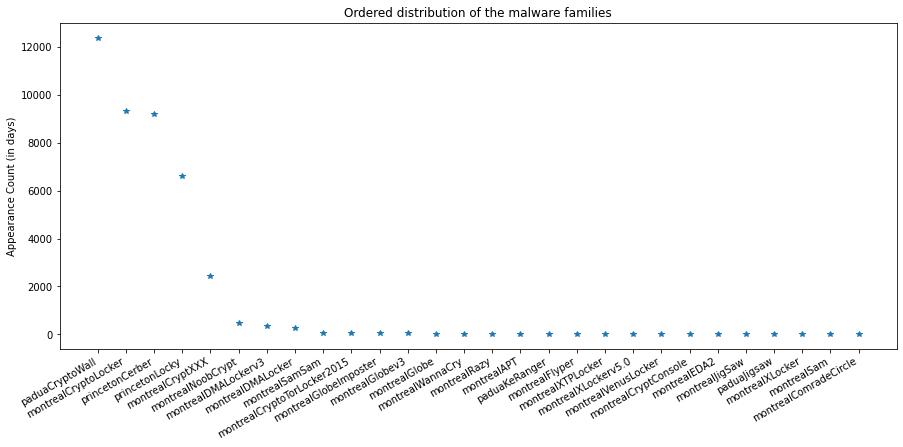

In [39]:
ransomware_labels = unique_labels[1:]
ransomware_counts = label_counts[1:]
plt.figure(figsize=(15,6))
plt.title('Ordered distribution of the malware families')
plt.ylabel('Appearance Count (in days)')
plt.plot(ransomware_labels, ransomware_counts, '*')
plt.xticks(rotation=30, ha='right')
plt.show()

In [112]:
df['year'].dropna() == df['year']

date
1970-01-12 00:00:00.000002017    True
1970-05-13 00:00:00.000002016    True
1970-09-04 00:00:00.000002016    True
1970-11-19 00:00:00.000002016    True
1970-08-27 00:00:00.000002016    True
                                 ... 
1970-11-27 00:00:00.000002018    True
1970-11-27 00:00:00.000002018    True
1970-11-27 00:00:00.000002018    True
1970-11-27 00:00:00.000002018    True
1970-11-27 00:00:00.000002018    True
Name: year, Length: 2916697, dtype: bool

In [127]:
df['date'] = pd.to_datetime(df['year'], format='%Y') + pd.to_timedelta(df['day'], unit='day')
df = df.set_index('date')

In [ ]:
df.query('label != "white"')\
    .filter(['date', 'label'])\
    .groupby('label')\
    .resample('Y')\
    .agg({'count': 'count'})\
    # .T\
    # .plot(subplots=True, kind='bar', rot=30)
    # .groupby('label')\
    # .resample('M')\
    # .agg('count')\

TypeError: no numeric data to plot